# Bharat Intern Project No :- 3

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('MNIST_train.csv')

In [2]:
data.shape

(42000, 785)

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([3, 6, 9, ..., 4, 3, 9], dtype=int64)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 8 ... 8 8 0] [3 6 9 ... 4 3 9]
0.11460975609756098
Iteration:  10
[4 6 8 ... 8 8 7] [3 6 9 ... 4 3 9]
0.13919512195121952
Iteration:  20
[4 6 8 ... 9 3 7] [3 6 9 ... 4 3 9]
0.17075609756097562
Iteration:  30
[8 6 8 ... 9 3 7] [3 6 9 ... 4 3 9]
0.21439024390243902
Iteration:  40
[5 6 8 ... 9 3 2] [3 6 9 ... 4 3 9]
0.26095121951219513
Iteration:  50
[5 6 8 ... 9 3 2] [3 6 9 ... 4 3 9]
0.323609756097561
Iteration:  60
[5 6 8 ... 9 3 2] [3 6 9 ... 4 3 9]
0.37782926829268293
Iteration:  70
[5 6 8 ... 9 3 2] [3 6 9 ... 4 3 9]
0.4139512195121951
Iteration:  80
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.4460731707317073
Iteration:  90
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.4793170731707317
Iteration:  100
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.5109512195121951
Iteration:  110
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.5426829268292683
Iteration:  120
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.5763170731707317
Iteration:  130
[3 6 9 ... 9 3 2] [3 6 9 ... 4 3 9]
0.6052195121951219
Iteration:  

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


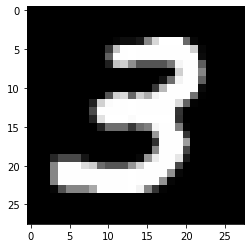

Prediction:  [6]
Label:  6


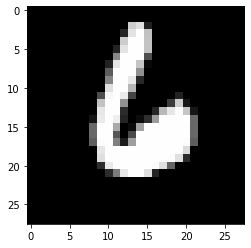

Prediction:  [9]
Label:  9


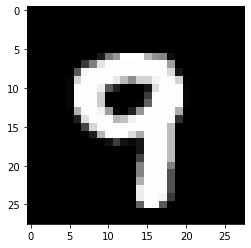

Prediction:  [3]
Label:  3


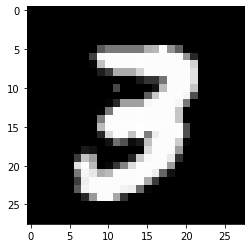

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 3 9 3 5 0 6 2 7 9 9 9 7 0 2 4 8 8 6 6 7 6 1 8 7 6 0 6 3 8 1 9 3 9 1 8 9
 8 9 2 0 3 1 2 3 7 0 1 0 6 7 5 4 3 7 1 7 2 6 7 6 0 9 8 4 0 9 4 3 8 2 2 2 6
 2 8 4 8 3 2 7 1 8 4 1 3 9 9 0 2 9 4 7 7 7 4 8 9 2 4 7 3 9 2 8 5 0 9 4 4 1
 0 9 2 6 5 7 2 3 2 2 6 2 1 2 6 3 7 3 9 9 7 3 8 8 5 5 9 1 0 7 6 7 3 4 3 8 3
 7 5 5 4 1 4 8 6 0 6 1 5 6 3 2 8 5 4 9 3 6 5 5 0 5 8 0 4 0 6 5 6 9 1 8 6 7
 3 2 2 1 2 0 9 7 4 0 4 0 5 7 5 4 6 6 1 2 5 9 4 2 6 8 3 9 6 7 5 0 0 1 7 9 6
 1 2 6 3 0 0 6 7 7 8 6 1 8 6 2 4 7 2 9 8 6 3 6 1 4 7 9 1 8 2 4 9 3 6 8 8 7
 3 6 4 8 0 3 4 4 4 5 3 6 9 9 1 3 9 7 7 7 0 3 7 0 9 4 5 2 3 9 9 6 4 1 9 7 0
 6 7 1 1 3 7 1 5 4 5 4 8 4 3 4 4 6 1 4 6 1 7 0 7 4 2 7 9 6 2 2 2 9 1 5 9 3
 5 9 9 3 3 2 4 2 7 7 9 1 9 3 3 9 1 5 7 1 2 2 0 6 0 7 8 7 0 2 0 8 5 6 9 9 4
 8 6 6 2 0 5 5 1 6 8 1 1 9 0 5 5 3 5 7 8 2 0 6 1 3 5 6 0 0 1 8 8 9 1 9 5 1
 1 2 0 1 0 7 7 8 9 2 0 3 8 9 8 9 9 1 0 3 6 5 4 2 3 0 5 8 4 6 8 1 2 2 2 4 5
 6 0 2 1 1 4 4 0 1 1 3 0 1 1 5 1 1 9 8 1 4 7 5 8 4 9 6 3 6 6 1 1 1 7 0 4 0
 5 9 1 4 8 2 4 1 5 5 5 2 

0.848